# Feedforward Neural Network on IRIS DATASET
#### Vanilla Gradient Descent

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm

In [2]:
# Read dataset, divide it into train and test set
dataset = pd.read_csv("iris.data",header = None)
dataset.loc[dataset[4] == "Iris-setosa",4] = 1
dataset.loc[dataset[4] == "Iris-versicolor",4] = 2
dataset.loc[dataset[4] == "Iris-virginica",4] = 3
dataset = dataset.to_numpy()
np.random.shuffle(dataset)

len_dataset = dataset.shape[0]

train = dataset[:int(0.75*len_dataset),:]
X = train[:,:-1]
X = X.astype('float64')
Y = train[:,-1]
Y = pd.get_dummies(Y)
Y = Y.to_numpy()
op_neurons=len(Y[0])
N,p = X.shape

test = dataset[int(0.75*len_dataset):,:]
Xt = test[:,:-1]
Xt = Xt.astype('float64')
Yt = test[:,-1]
Yt = pd.get_dummies(Yt)
Yt = Yt.to_numpy()
Nt,pt = Xt.shape

print("Each Datapoint contains ",p,"features and belong to either of ",op_neurons,"class.")

Each Datapoint contains  4 features and belong to either of  3 class.


In [3]:
def sigmoid(x):
    return ((1)/(1+np.exp(-x)))

def sigmoid_derivative(x):
    result = np.multiply(sigmoid(x) , (1-sigmoid(x)))
    return(result)

In [4]:
def softmax(x):
    num = np.exp(x)
    den = np.sum(num,axis = 0,keepdims = True)
    return (num / den)

In [5]:
def compute_cost(h,Y):
    N = Y.shape[0]
    logprobs = np.multiply(Y,np.log(h)) + np.multiply(1-Y,np.log(1-h))
    cost = (-1/N)*np.sum(logprobs)
    
    cost = float(np.squeeze(cost))  # return [[17]] as 17
    return cost

In [6]:
# Neural Network Model parameters initialization function, parameters to be saved in a dictionary
def parameter_init(layers):
    parameters = {}
    for i in range(1,len(layers)):
        parameters["W"+str(i)] = 0.01*np.random.randn(layers[i],layers[i-1])
        parameters["b"+str(i)] = np.zeros((layers[i],1))
    return (parameters)

In [7]:
# Structure of Neural network, saved into a list to modify easily
structure = [p,12,8,op_neurons]
print("The Structure of this neural network is ",structure)

# Initialize parameters
parameters = parameter_init(structure)

The Structure of this neural network is  [4, 12, 8, 3]


100%|██████████| 15000/15000 [00:03<00:00, 4089.05it/s]


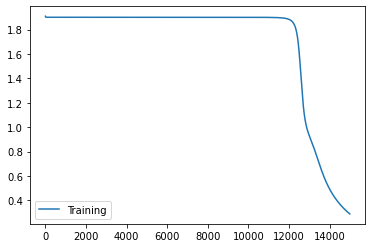

Training Cost 0.2894862269583509


In [8]:
# Implementation of Network using Gradient Descent
epochs = 15000
alpha = 0.05
costs = []
for num in tqdm(range(epochs)):
    #Forward Propogation
    a1 = np.dot(parameters["W1"],X.T) + parameters["b1"]
    h1 = sigmoid(a1)
    a2 = np.dot(parameters["W2"],h1) + parameters["b2"]
    h2 = sigmoid(a2)
    a3 = np.dot(parameters["W3"],h2) + parameters["b3"]
    h3 = softmax(a3)
    # Gradients for Backpropogation
    
    dL_da3 = -( Y.T - h3)
    dL_dW3 = (1/N)*np.dot(dL_da3 , h2.T)
    dL_db3 = (1/N)*(np.sum(dL_da3,axis=1,keepdims = True))
    
    dL_dh2 = np.dot(parameters["W3"].T , dL_da3)
    dL_da2 = np.multiply(dL_dh2,sigmoid_derivative(a2))
    dL_dW2 = (1/N)*np.dot(dL_da2 , h1.T)
    dL_db2 = (1/N)*(np.sum(dL_da2,axis=1,keepdims = True))
    
    dL_dh1 = np.dot(parameters["W2"].T , dL_da2)
    dL_da1 = np.multiply(dL_dh1,sigmoid_derivative(a1))
    dL_dW1 = (1/N)*np.dot(dL_da1 , X)
    dL_db1 = (1/N)*(np.sum(dL_da1,axis = 1,keepdims = True))
    
    # GD Updates
    parameters["W3"] = parameters["W3"] - (alpha)*dL_dW3
    parameters["b3"] = parameters["b3"] - (alpha)*dL_db3
    parameters["W2"] = parameters["W2"] - (alpha)*dL_dW2
    parameters["b2"] = parameters["b2"] - (alpha)*dL_db2
    parameters["W1"] = parameters["W1"] - (alpha)*dL_dW1
    parameters["b1"] = parameters["b1"] - (alpha)*dL_db1
    costs.append(compute_cost(h3.T,Y))
plt.plot(costs,label = "Training")
plt.legend()
plt.show()
print("Training Cost",costs[-1])

In [9]:
# Prediction on training set
k = 12
print("Actual Y=",Y[k],"\t\nPredicted y=",h3.T[k])

Actual Y= [0 1 0] 	
Predicted y= [0.03989423 0.93263562 0.02747015]


In [10]:
# Prediction on test set
#Forward Propogation
a1t = np.dot(parameters["W1"],Xt.T) + parameters["b1"]
h1t = sigmoid(a1t)
a2t = np.dot(parameters["W2"],h1t) + parameters["b2"]
h2t = sigmoid(a2t)
a3t = np.dot(parameters["W3"],h2t) + parameters["b3"]
h3t = softmax(a3t)
print("Cost of test set",compute_cost(h3t.T,Yt))

Cost of test set 0.33663161198236


In [11]:
# Converting Predictions into Lables
y_pred = np.asmatrix(np.argmax(h3t.T,axis = 1)).T
#y_pred

In [12]:
# Checking number of mislables in test set
mislabel_index = []
YYYY = np.asmatrix(np.argmax(Yt,axis=1)).T
count = 0
for i in range(len(YYYY)):
    if y_pred[i] != YYYY[i]:
        mislabel_index.append(i)
        count = count+1

print("The number of datapoints in test set wrongly labeled by the NN is/are ",count,"out of total ",Nt,"datapoints")

The number of datapoints in test set wrongly labeled by the NN is/are  1 out of total  38 datapoints
